# (Tmdb Data set investigation)
## by (Abdelrahman Ragab)

## Investigation Overview

> To show case My investigation in a Type of a story .

## Dataset Overview

> It's the 2015 TMDB Movies Dataset.

>There are 5106 after cleaning Movies in this dataset With 21 featuers.

>most of the featuers are numeric exactly 11 and 10 are categorical.

>the data types are 6 integers , 4 floats , 1 date , 10 Strings.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_movies = pd.read_csv('tmdb-movies.csv')

df_movies['revenue_adj'] = df_movies['revenue_adj'].astype(int)

df_movies['budget_adj'] = df_movies['budget_adj'].astype(int)

df_movies['revenue'] = df_movies['revenue'].astype(int)

df_movies['budget'] = df_movies['budget'].astype(int)


In [3]:
df_movies.isnull().sum()

df_movies.drop(['homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

df_movies.dropna(inplace=True)

df_movies.isnull().sum()


id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [4]:
df_movies.drop_duplicates(inplace=True) 

df_movies.duplicated().sum()

df_movies = df_movies[df_movies.budget >= 100]

df_movies = df_movies[df_movies.revenue > 0]

## (Budget moneywise)

> When we polted the Budegt we found out that the range of the Movies btween 10 million to 100 million

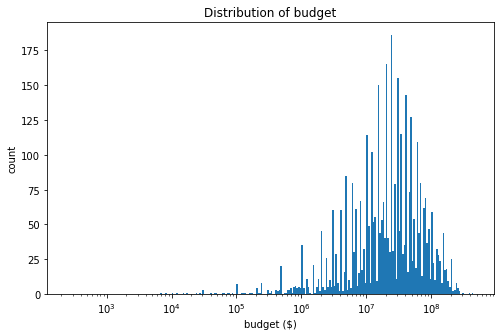

In [10]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_movies['budget'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of budget')
plt.hist(data = df_movies, x = 'budget', bins = bins)
plt.xscale('log')
plt.xlabel('budget ($)')
plt.ylabel('count')
plt.show()

## (Revenue -The Movies profit)

> The ranage of the Movies revenue is btween 10Million to 1Billion , We found that when we ploted the revenue and will talk about the realation btween the Movies budget and the revenue in the Nwt Slide

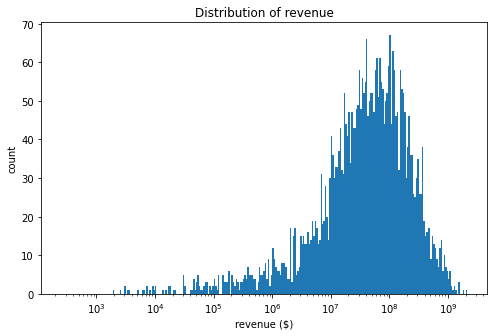

In [11]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_movies['revenue'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_movies, x = 'revenue', bins = bins)
plt.title('Distribution of revenue')
plt.xscale('log')
plt.xlabel('revenue ($)')
plt.ylabel('count')

plt.show()

## (Relation btween Revenue and Budget)
> This plot can show that the more you spend the more you earn and this plot show case that Most of the Movies get 400% profit in the Most of the Time and we will take about the time element and the revenue in the next slide

Text(0, 0.5, 'Budget')

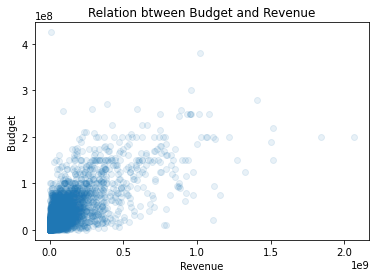

In [12]:
plt.scatter(data=df_movies,x='revenue',y='budget',alpha = 1/10)
plt.title('Relation btween Budget and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')

## (Relation btween Revenue and Budget throw out the years)
> This plot can shows How much the budget and revenue increasd and how the revenue specifically increasd exponentially.

>This plot showcase the Movies from the year 2000

In [8]:
df_movies_M100 = df_movies[df_movies.revenue >= 100000000]
df_movies_M100 = df_movies_M100[df_movies_M100.release_year >= 2000]

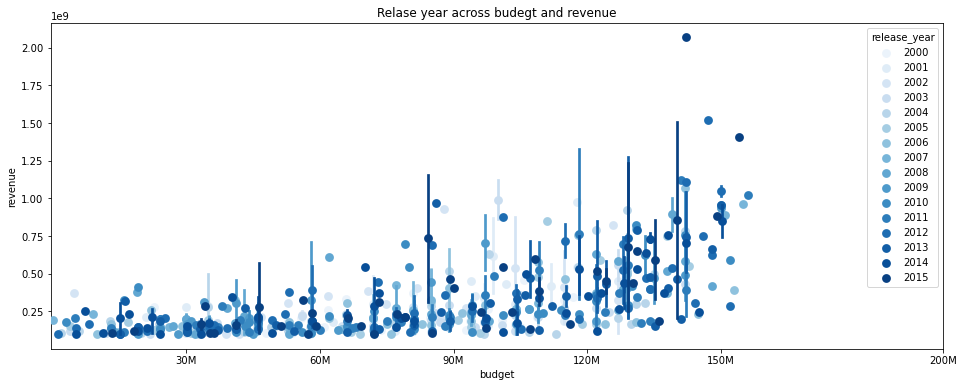

In [9]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = df_movies_M100, x = 'budget', y = 'revenue', hue = 'release_year',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Relase year across budegt and revenue')
ax.set_xticklabels([],minor = False)
plt.xticks([30,60,90,120,150,200],['30M','60M','90M','120M','150M','200M'])

plt.show();